In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

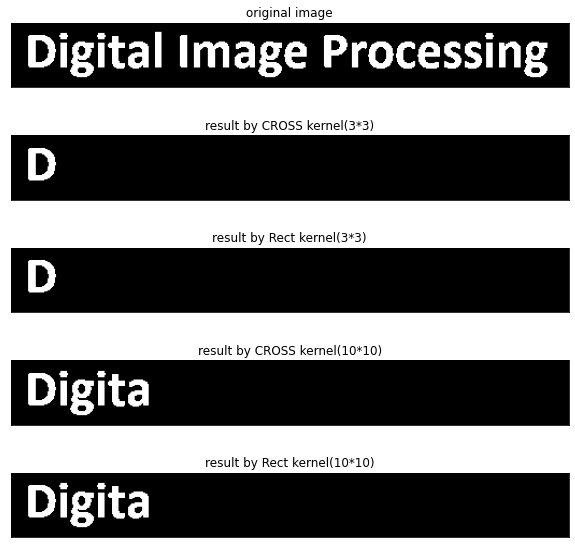

In [6]:
def rigion_extractor(start_point, kernel_shape, kernel_size, img):  
  # X_current means Xn
  X_current = np.zeros(A.shape)

  # X_last means Xn-1
  # At first all the pixels of X_last are zero
  # expect one pixel start_point
  X_last = np.zeros(A.shape)
  X_last[start_point[0],start_point[1]] = 1

  kernel = cv2.getStructuringElement(shape=kernel_shape, ksize=kernel_size)
  X_current = np.uint8(cv2.dilate(X_last, kernel ,iterations = 1)) & (img)

  # End condition is Xn-1==Xn
  while np.any(X_current != X_last):
      X_last = X_current
      X_current = np.uint8(cv2.dilate(X_last, kernel ,iterations = 1)) & (img)

  result = X_current
  return result

A = cv2.imread(filename="text.png", flags=cv2.IMREAD_GRAYSCALE)
thresh_val, A = cv2.threshold(src=A, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
A = np.array(cv2.normalize(A.astype('uint8'), None, 0, 1, cv2.NORM_MINMAX))

# Position of pixel in the connected components
P = [14,20]

CROSS_result_3 = rigion_extractor(P, cv2.MORPH_CROSS, (3,3), A)
RECT_result_3 = rigion_extractor(P, cv2.MORPH_RECT, (3,3), A)
CROSS_result_10 = rigion_extractor(P, cv2.MORPH_CROSS, (10,10), A)
RECT_result_10 = rigion_extractor(P, cv2.MORPH_RECT, (10,10), A)

fig, axes = plt.subplots(5,1, figsize=(10,10))
axes[0].imshow(A, cmap='gray')
axes[0].set_title("original image")

axes[1].imshow(CROSS_result_3, 'gray')
axes[1].set_title("result by CROSS kernel(3*3)")

axes[2].imshow(RECT_result_3, 'gray')
axes[2].set_title("result by Rect kernel(3*3)")

axes[3].imshow(CROSS_result_10, 'gray')
axes[3].set_title("result by CROSS kernel(10*10)")

axes[4].imshow(RECT_result_10, 'gray')
axes[4].set_title("result by Rect kernel(10*10)")

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
